# SI 618 Homework #4

## Taylor Swift songs

Last updated 2024-13-02

The dataset for this assignment is from https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data.

**NOTE**: Use the dataset from Canvas rather than the dataset from Kaggle, which is updated frequently and may change while you are completing this assignment.

This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift. I set up the dataset to update monthly so that if any albums get added it will get added to the dataset too. At first it may look like there are song duplicates but I checked and all song IDs are unique.

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.

We are going to refer to the tracks' properties of danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence as "features" of the tracks.



Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

Be sure to include interpretations of your results for each question.

Q1:             
* Show the distribution of the popularity of the songs.  Then exclude the songs that are marked as "Taylo'r version".  Show the distribution of the popularity of the songs.  What is the difference between the two distributions?
* (b)Show the variation in song popularity over the years. Are there any notable trends or observations? Please explain. (10)

Q1 Answer

(a) The distribution of the popularity of her songs tends to be peak at 70 points of popularity, with this fact skewing the distribution of all song popularity toward the right. The number of songs at a score of 70 for popularity or higher maxes out at about 90, and then trails off at 40 songs for higher than 70, and less. For the song distribution without Taylor's Version, the number of songs seem primarily clustered with a popularity of 60 or below, with the number of songs staying consistently at 30 through 20. The number of popular songs with a score of 70 or higher peaks at 50 total songs, with a significant drop for total songs higher than 70. The Spotify popularity score is how often the songs are getting played, which may indicate that some of the newer recordings are getting less plays compared to other total songs played. 

(b) The popularity of her songs varied substantially in 2017, with her release of Reputation. Her release of Reputation (which was seen as a sort of career pivot and PR reinvention) helped increase the popularity of her songs consistently. There was a small dip after 2020, which was around the time she started releasing her re-recorded versions.


In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [20]:
ts = pd.read_csv('/Users/shirleyaraizasantaella/Documents/UMich/Grad School Year 2/Semester_2/SI_618_DataManipulationAndAnalysis/SI_618_WN_24_Files/inclass/taylor_swift_spotify.csv')

In [21]:
ts

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,71,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,72,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,74,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,72,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,71,193289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,525,Our Song,Taylor Swift,2006-10-24,11,15DeqWWQB4dcEWzJg15VrN,spotify:track:15DeqWWQB4dcEWzJg15VrN,0.111000,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,76,201106
526,526,I'm Only Me When I'm With You,Taylor Swift,2006-10-24,12,0JIdBrXGSJXS72zjF9ss9u,spotify:track:0JIdBrXGSJXS72zjF9ss9u,0.004520,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,61,213053
527,527,Invisible,Taylor Swift,2006-10-24,13,5OOd01o2YS1QFwdpVLds3r,spotify:track:5OOd01o2YS1QFwdpVLds3r,0.637000,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,58,203226
528,528,A Perfectly Good Heart,Taylor Swift,2006-10-24,14,1spLfUJxtyVyiKKTegQ2r4,spotify:track:1spLfUJxtyVyiKKTegQ2r4,0.003490,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,56,220146


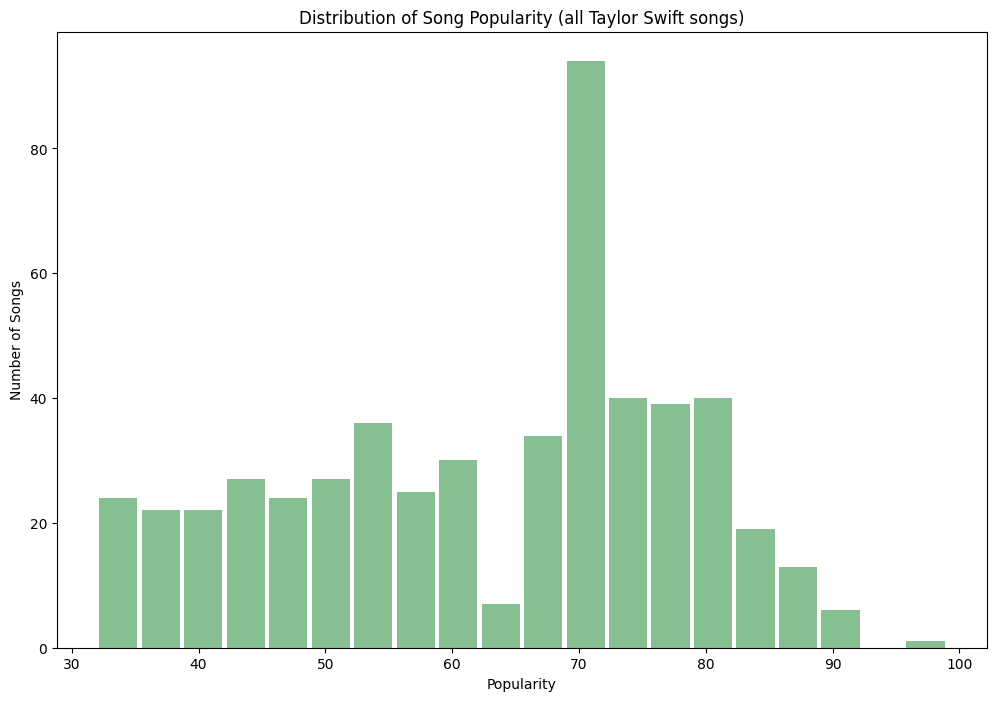

In [8]:
ts.hist(column = 'popularity', bins = 20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.title('Distribution of Song Popularity (all Taylor Swift songs)')
plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.show()


In [37]:
album_songs = ts.groupby('album')['name'].apply(list)
print(album_songs)
album_songs.to_csv('album_songs.csv')


album
1989                                                                                   [Welcome To New York, Blank Space, Style, Out ...
1989 (Deluxe Edition)                                                                  [Welcome To New York, Blank Space, Style, Out ...
1989 (Taylor's Version)                                                                [Welcome To New York (Taylor's Version), Blank...
1989 (Taylor's Version) [Deluxe]                                                       [Welcome To New York (Taylor's Version), Blank...
Fearless                                                                               [Fearless, Fifteen, Love Story, Hey Stephen, W...
Fearless (Taylor's Version)                                                            [Fearless (Taylor’s Version), Fifteen (Taylor’...
Fearless Platinum Edition                                                              [Jump Then Fall, Untouchable, Forever & Always...
Live From Clear Channel Stripped 20

In [33]:
copy_ts = ts.copy()
copy_ts['album'] = copy_ts['album'].str.contains("(Taylor's Version)", case=False)
copy_ts

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_45982/407053446.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  copy_ts['album'] = copy_ts['album'].str.contains("(Taylor's Version)", case=False)


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
0,0,Welcome To New York (Taylor's Version),True,2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,71,212600,2023
1,1,Blank Space (Taylor's Version),True,2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,72,231833,2023
2,2,Style (Taylor's Version),True,2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,74,231000,2023
3,3,Out Of The Woods (Taylor's Version),True,2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,72,235800,2023
4,4,All You Had To Do Was Stay (Taylor's Version),True,2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,71,193289,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,525,Our Song,False,2006-10-24,11,15DeqWWQB4dcEWzJg15VrN,spotify:track:15DeqWWQB4dcEWzJg15VrN,0.111000,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,76,201106,2006
526,526,I'm Only Me When I'm With You,False,2006-10-24,12,0JIdBrXGSJXS72zjF9ss9u,spotify:track:0JIdBrXGSJXS72zjF9ss9u,0.004520,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,61,213053,2006
527,527,Invisible,False,2006-10-24,13,5OOd01o2YS1QFwdpVLds3r,spotify:track:5OOd01o2YS1QFwdpVLds3r,0.637000,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,58,203226,2006
528,528,A Perfectly Good Heart,False,2006-10-24,14,1spLfUJxtyVyiKKTegQ2r4,spotify:track:1spLfUJxtyVyiKKTegQ2r4,0.003490,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,56,220146,2006


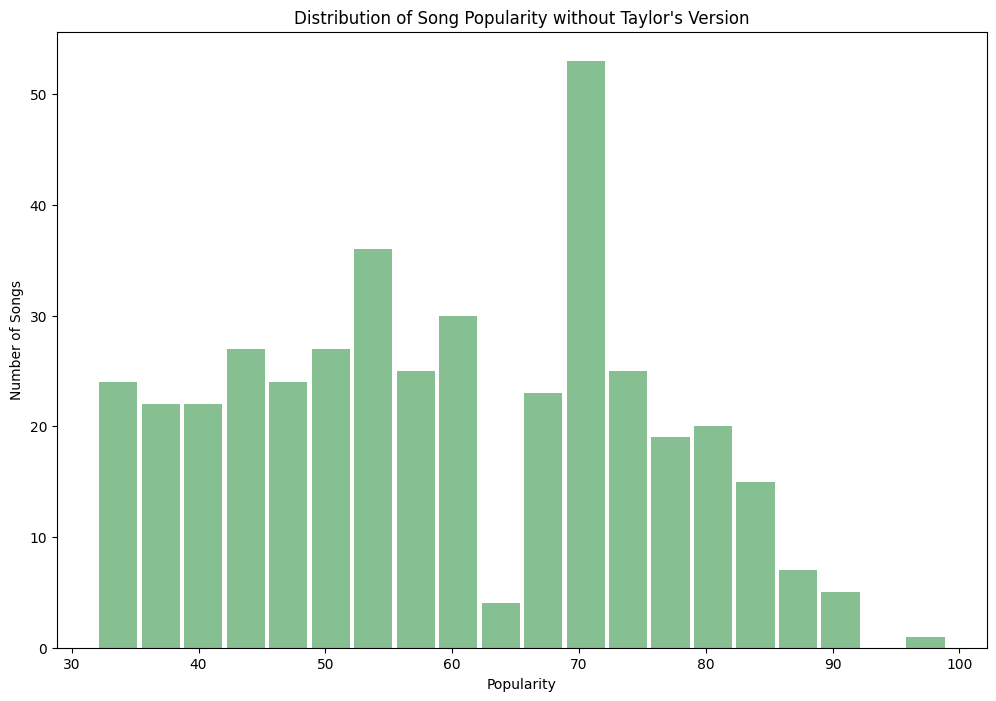

In [7]:
#remove songs where the name has (Taylor's Version) in it
copy_wo_tv = ts[ts['name'].str.contains(r'Taylor[\`\'\’]s Version', case=False, na=False, regex=True)==False]
hist = copy_wo_tv.hist(column = 'popularity', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.title("Distribution of Song Popularity without Taylor's Version")
plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.show()

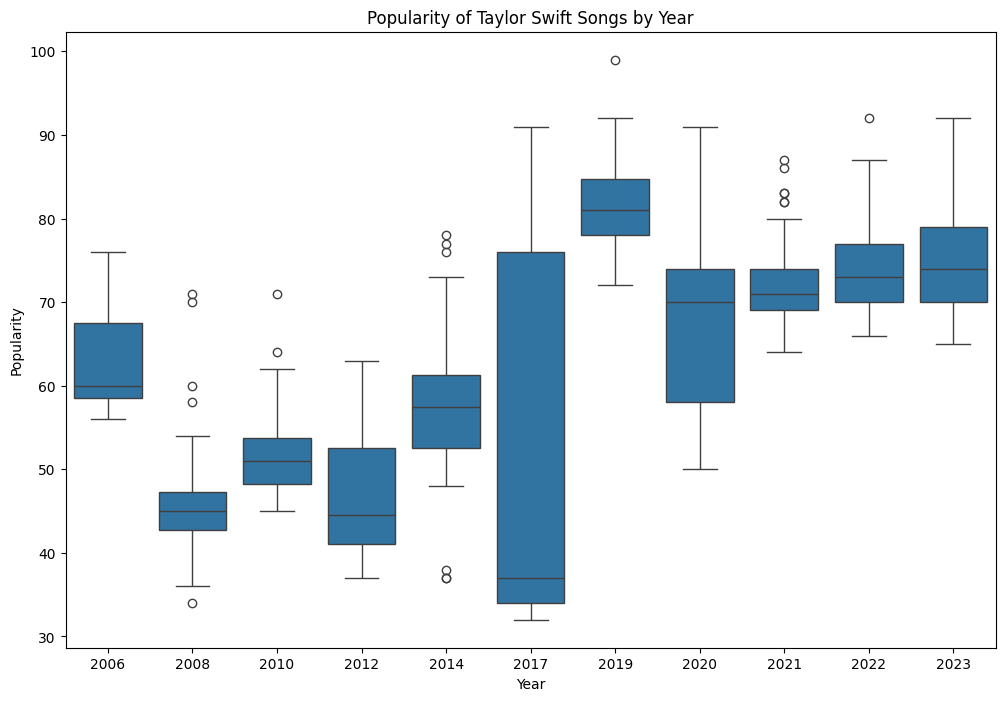

In [26]:
ts['release_date'] = pd.to_datetime(ts['release_date'])
ts['year'] = ts['release_date'].dt.year

# #Difference in popularity of songs by year
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="year", y="popularity", data=ts)
plt.title('Popularity of Taylor Swift Songs by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()


Q2:                     
* Report the average track duration for each album.     
* Your answer should be in mm:ss (minutes:seconds) format rather than the milliseconds that are reported in the original dataset. (10)

I first grouped together the albums and the duration of the songs and took the mean. I then converted the format of the songs by by using a lambda function. I got help from copilot to trouble shoot the code.

In [34]:
average_ts_data = ts.groupby('album')['duration_ms'].mean()
average_ts_data = average_ts_data / 1000
average_ts_data = average_ts_data.apply(lambda x: '{:02d}:{:02d}'.format(int(x // 60), int(x % 60)))

print(average_ts_data)

album
1989                                                                                   03:45
1989 (Deluxe Edition)                                                                  03:37
1989 (Taylor's Version)                                                                03:42
1989 (Taylor's Version) [Deluxe]                                                       03:41
Fearless                                                                               04:07
Fearless (Taylor's Version)                                                            04:05
Fearless Platinum Edition                                                              04:10
Live From Clear Channel Stripped 2008                                                  03:29
Lover                                                                                  03:26
Midnights                                                                              03:23
Midnights (3am Edition)                                         

Q3:     
* Generate correlation heatmaps to visualize the relationships between song features, utilizing a diverging color map with white representing a zero correlation.       
* Identify the top five strongest correlations among these features.    
* Provide an analysis of your findings, including explanations for why certain variables exhibit strong correlations and the potential rationale behind these relationships.



Q3 Answer

The strongest correlations were the following: 

loudness & energy       | 0.788294

acousticness & loudness |-0.717599

energy & acousticness   |-0.709822

year & popularity       | 0.612813

valence & energy        | 0.474844

For the moderate to strong negative correlation of acoustic songs and the loudness and energy, which this pattern tracks. Since many of the slower songs in Swift's discography tend to have heavy piano and string guitar elements, this may be seen through lower beats per minute and more calm or sad sentiments. 

A moderate positive correlation based on the valence, or the musical positivity portrayed and its energy. Although positivity might be a bit subjective, more upbeat songs with different instruments and beats may contribute to more energy.

Moderate positive correlation of year and popularity of a song. This one may be indicative of the type of reception or marketing that the album released, and could be related to the increase in popularity of TS discography after the release of Reputation. 


loudness  energy          0.788294
          acousticness   -0.717599
energy    acousticness   -0.709822
year      popularity      0.612813
valence   energy          0.474844
dtype: float64

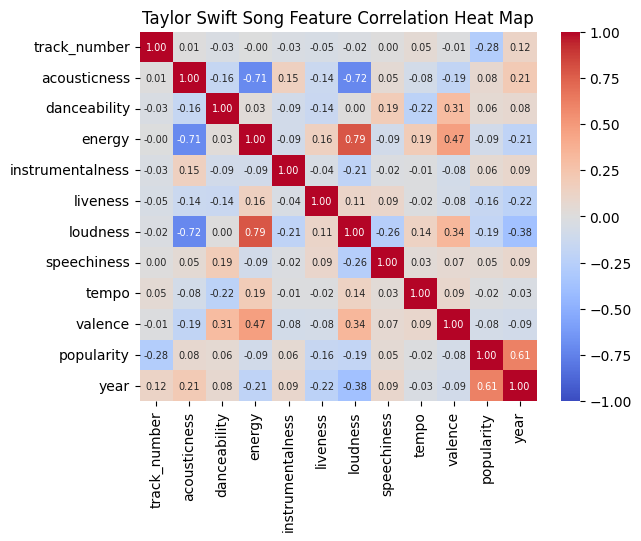

In [51]:
#Drop string columns
ts_corr = ts.drop(['Unnamed: 0', 'id', 'name', 'album', 'uri', 'release_date', 'duration_ms'], axis=1)

#Heat Map
sns.heatmap(ts_corr.corr(),cmap="coolwarm", vmax=1, vmin=-1, annot=True, fmt=".2f", annot_kws={"size": 7})
plt.title('Taylor Swift Song Feature Correlation Heat Map')

#Top five correlations by absolute value
ts_corr.corr().where(ts_corr.corr()!=1).unstack().sort_values(ascending=False, key=abs).drop_duplicates().head(5)

Q4: 
- Analyze how the position of the track on the album (i.e., track number) influences the song's popularity, considering additional musical features. 
- Specifically, evaluate the correlation between track number and popularity, and then examine if certain musical features (e.g., danceability, energy, acousticness) mediate this relationship. 
- Use both visual and statistical evidence to support your findings. 
- Discuss how these features may interact with track position to affect a song's popularity (10)

Q4 Answer

There is negative but moderately weak relationship of -.28 to the popularity of a song and its track number of an album.

The Ordinary Least Squares (OLS) regression model applied to the dataset, indicates that only the track number significantly affects the popularity of songs, showing a negative relationship. However, variables such as danceability, energy, and acousticness do not have statistically significant impacts on popularity, with its coefficients being not statistically significant at conventional levels (p > 0.05).The model explains a limited portion (8.8%) of the variance in popularity, suggesting that additional factors beyond those included in the model likely influence a song's popularity.

In [71]:
track_corr = ts['popularity'].corr(ts['track_number']).round(2)
print(f"Correlation between popularity and track number: {track_corr}")

Correlation between popularity and track number: -0.28


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     12.65
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.84e-10
Time:                        13:10:16   Log-Likelihood:                -2172.2
No. Observations:                 530   AIC:                             4354.
Df Residuals:                     525   BIC:                             4376.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           65.6154      5.303     12.372   

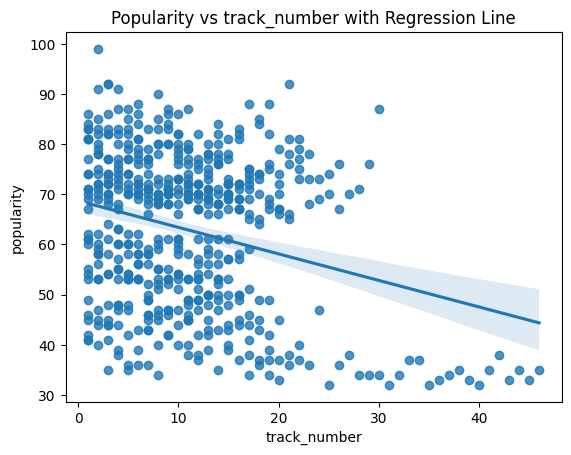

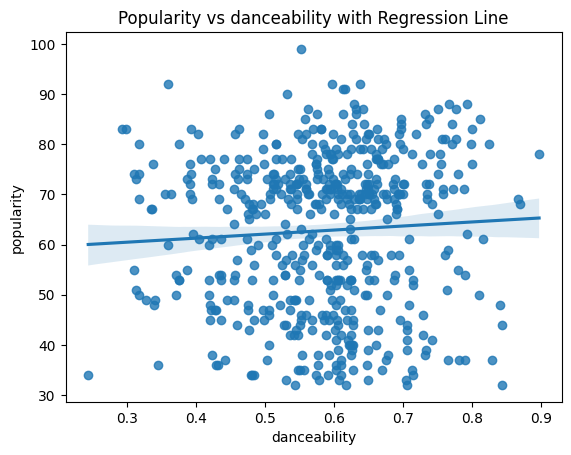

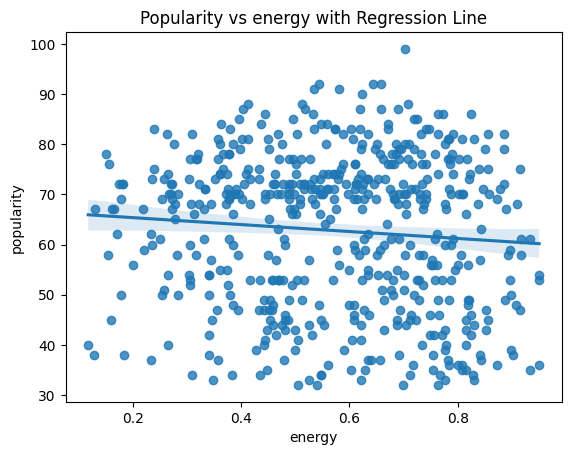

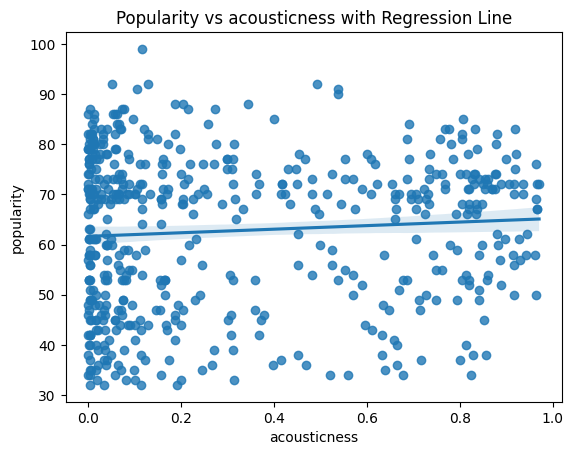

In [56]:
X = ts[['track_number', 'danceability', 'energy', 'acousticness']] # independent variables
X = sm.add_constant(X) # adding a constant
y = ts['popularity'] # dependent variable

model = sm.OLS(y, X) 
results = model.fit() 

print(results.summary())

for feature in ['track_number', 'danceability', 'energy', 'acousticness']: # independent variables
    sns.regplot(x=feature, y='popularity', data=ts)  # x, y
    plt.title(f'Popularity vs {feature} with Regression Line') # title
    plt.show()

Q5:
- Explore the characteristics that differentiate popular songs from less popular ones. 
- Divide the songs into popular (popularity rating of 60 or higher) and less popular (popularity rating of less than 60). 
- Conduct a comparative analysis of these two groups across multiple features: danceability, energy, acousticness, and tempo. 
- Use ANOVA tests to determine if differences in these features between popular and less popular songs are statistically significant. 
- Additionally, explore if there's a notable trend in the duration of songs (duration_ms) between the two groups. (15)

Q5 Answer

In the analysis of song characteristics, including danceability, energy, and acousticness, between popular and less popular categories, ANOVA tests were conducted for each feature.

For the feature "danceability," the F-statistic is 1.001 with a p-value of 0.317, indicating that there is no statistically significant difference in danceability between popular and less popular songs.


For "energy," the F-statistic is 6.655 with a p-value of 0.010, suggesting that there is a statistically significant difference in energy between popular and less popular songs.


For "acousticness," the F-statistic is 5.391 with a p-value of 0.021, indicating a statistically significant difference in acousticness between the two categories.


For "tempo," the F-statistic is 0.002 with a p-value of 0.968, indicating that there is no statistically significant difference in tempo between popular and less popular songs.


For "duration_ms," the F-statistic is 0.0016 with a p-value of 0.968, indicating no statistically significant difference in song duration between popular and less popular categories.

In [79]:
# Divide the songs into popular and less popular
popular = ts[ts['popularity'] >= 60]
less_popular = ts[ts['popularity'] < 60]

popular['popularity_label'] = 'popular'
less_popular['popularity_label'] = 'less_popular'
ts = pd.concat([popular, less_popular])

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_45982/286282962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular['popularity_label'] = 'popular'
/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_45982/286282962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_popular['popularity_label'] = 'less_popular'


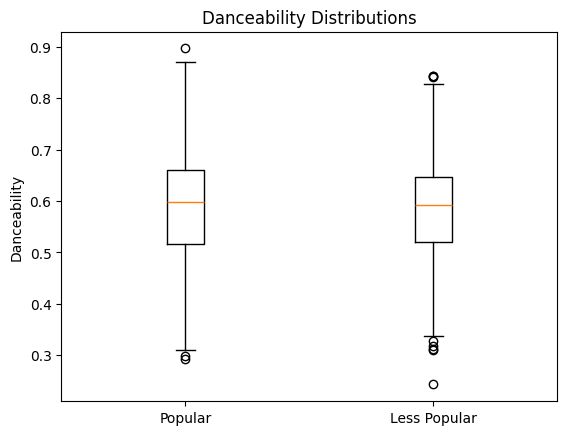

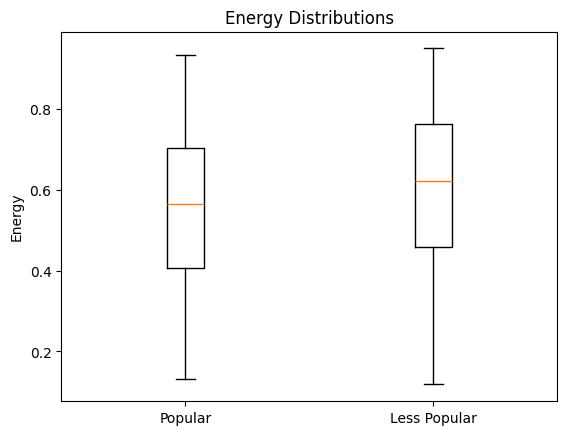

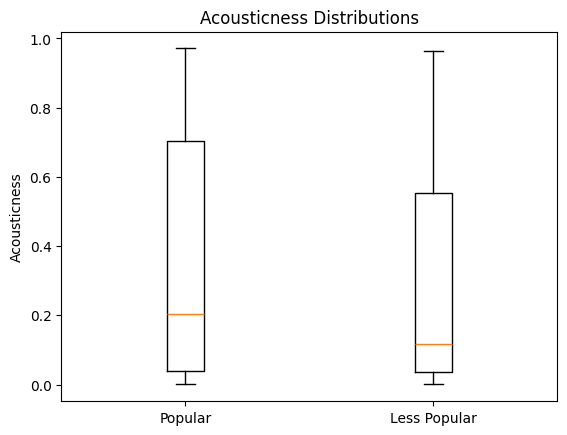

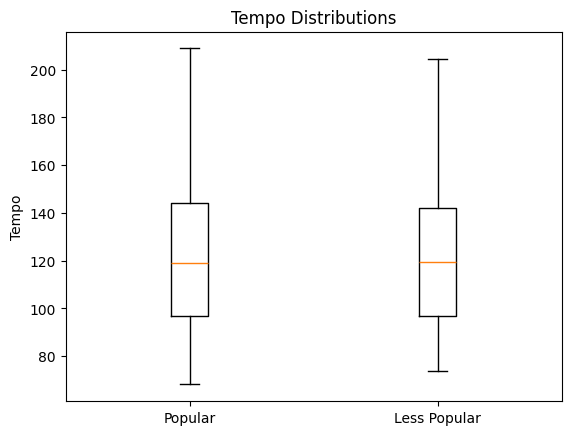

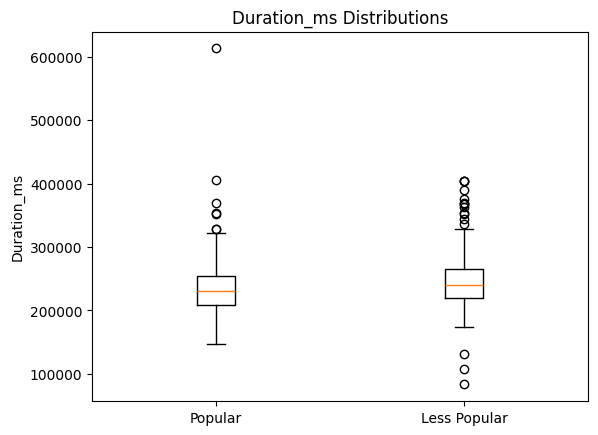

In [84]:
features = ['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']

# Create box plots to compare the distributions
for feature in features:
    plt.boxplot([popular[feature], less_popular[feature]], labels=['Popular', 'Less Popular'])
    plt.title(f'{feature.capitalize()} Distributions')
    plt.ylabel(feature.capitalize())
    plt.show()

In [85]:
# Perform comparative analysis and ANOVA tests
for feature in features:
    print(f"\nFeature: {feature}")
    print(ts.groupby('popularity_label')[feature].describe())


    model = ols(f'{feature} ~ C(popularity_label)', data=ts).fit()  #github copilot helped me with this segment
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nANOVA table:")
    print(anova_table)


Feature: danceability
                  count      mean       std    min    25%    50%    75%    max
popularity_label                                                              
less_popular      213.0  0.579286  0.110724  0.243  0.521  0.593  0.646  0.843
popular           317.0  0.589315  0.114701  0.292  0.516  0.598  0.661  0.897

ANOVA table:
                       sum_sq     df         F    PR(>F)
C(popularity_label)  0.012814    1.0  1.001376  0.317436
Residual             6.756490  528.0       NaN       NaN

Feature: energy
                  count      mean       std    min    25%    50%    75%    max
popularity_label                                                              
less_popular      213.0  0.600657  0.197578  0.118  0.458  0.623  0.763  0.950
popular           317.0  0.557107  0.185685  0.131  0.406  0.564  0.703  0.934

ANOVA table:
                        sum_sq     df         F    PR(>F)
C(popularity_label)   0.241624    1.0  6.654649  0.010159
Residual     

Q6:
- Build a multiple linear regression model to predict the popularity of a song based on a set of acoustic features: 'liveness', 'danceability', 'energy', and 'acousticness'. Evaluate the model by reporting:

    - The coefficient of determination (i.e. $r^2$) for the entire model to understand how well these variables together predict song popularity.
    - The statistical significance of the regression model and each predictor variable within it.
    - Predictions for song popularity at two different levels of 'liveness': 0.22 and 0.50, while holding other variables at their mean values." (20)

Q6 Answer

$r^2$ value is 0.032, indicating that approximately 3.2% of the variability in popularity is explained by the independent variables included in the model.

 The "Prob (F-statistic)" value is 0.00188, indicating that the regression model is statistically significant at the conventional significance level (e.g., 0.05).
 
 'Liveness' is statistically significant (p-value = 0.001), while 'danceability', 'energy', and 'acousticness' are not statistically significant at conventional levels.

We substitute the given levels of 'liveness' (0.22 and 0.50) into the regression equation while holding other variables at their mean values.

At .22 liveness popularity

62.9373 + (0.22*-15.3336) + (0.585285*6.2513) +  (0.319247*1.6693) + (0.574609*-3.2302) = 61.8995171458

At .5 liveness popularity

62.9373 + (0.50*-15.3336) + (0.585285*6.2513) +  (0.319247*1.6693) + (0.574609*-3.2302) = 57.6061091458


In [86]:
# Calculate the mean values of the predictors
mean_values = ts[['liveness', 'danceability', 'energy', 'acousticness']].mean()
print(mean_values)

liveness        0.163492
danceability    0.585285
energy          0.574609
acousticness    0.319247
dtype: float64


In [69]:
#OLS Regression

X = ts[['liveness', 'danceability', 'energy', 'acousticness']]
X = sm.add_constant(X)  # add a constant (intercept term) to the predictors
y = ts['popularity']


model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4.328
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00188
Time:                        23:40:29   Log-Likelihood:                -2188.0
No. Observations:                 530   AIC:                             4386.
Df Residuals:                     525   BIC:                             4407.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           62.9373      5.500     11.442   

Q7:
- In addition to analyzing the popularity scores of original vs. re-recorded songs by Taylor Swift, evaluate the differences in their musical characteristics, including danceability, energy, acousticness, and duration_ms. Perform the following analyses:

    - a) Create visualizations that compare the distribution of popularity scores, as well as the mentioned acoustic features, between original and re-recorded songs.

    - b) Conduct statistical tests to determine if there are significant differences in popularity, danceability, energy, acousticness, and duration between the original and re-recorded songs. Report which versions are more favorable in terms of popularity and how the musical characteristics have changed in the re-recorded versions. 
- hint: The re-recorded ones have `(Taylor’s version)` at the end of the album name. (20)

Q7 Answer

Significant differences were found between original and re-recorded songs in terms of popularity (p < 0.05), indicating variations in audience preference. No statistically significant differences were observed in danceability, energy, or acousticness between the two versions. Duration did not significantly differ between the versions, the re-recorded songs appeared to maintain similar musical characteristics as the original versions. Despite popularity differences, both versions seem comparable in terms of danceability, energy, and acousticness.

In [58]:
# Create a new column to indicate whether a song is a re-recorded version
ts['rerecorded'] = np.where(ts['name'].str.contains(r'Taylor[\`\'\’]s Version', case=False, na=False, regex=True), 'Yes', 'No') #github copilot assisted with the regex
ts.groupby('rerecorded')[['popularity', 'danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']].mean()

,popularity,danceability,energy,acousticness,tempo,duration_ms
rerecorded,,,,,,
No,59.268949,0.585655,0.555785,0.365999,121.129545,237447.122249
Yes,74.586777,0.584033,0.638240,0.161215,126.397860,248535.520661


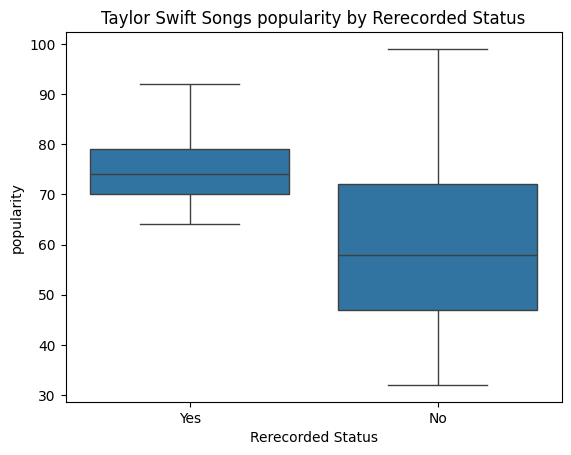

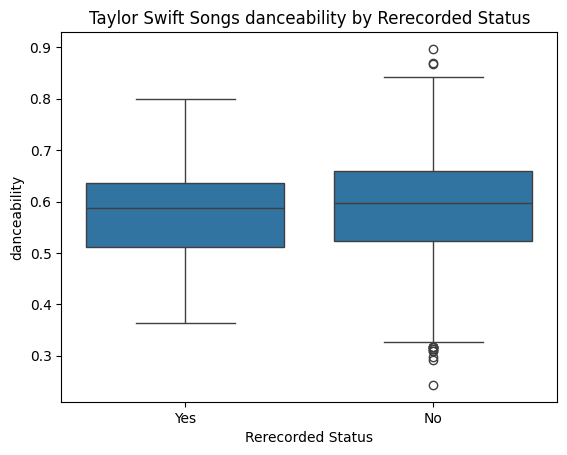

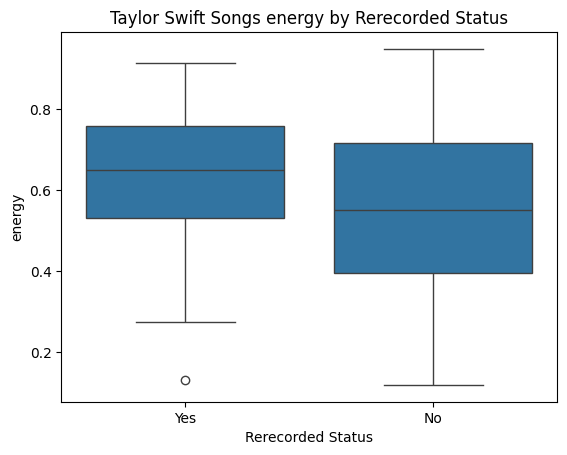

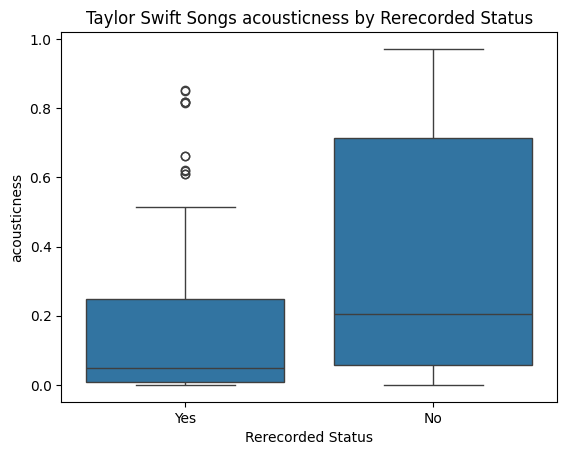

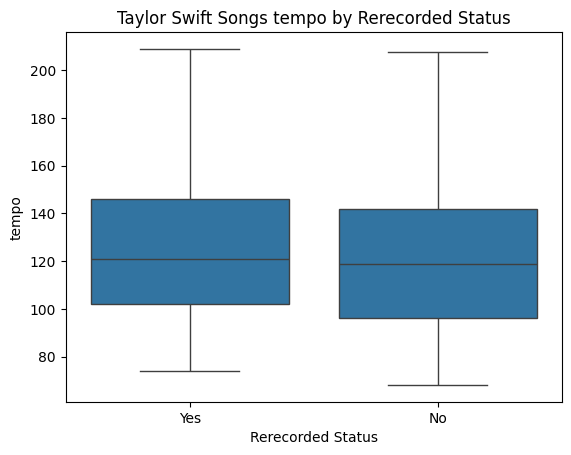

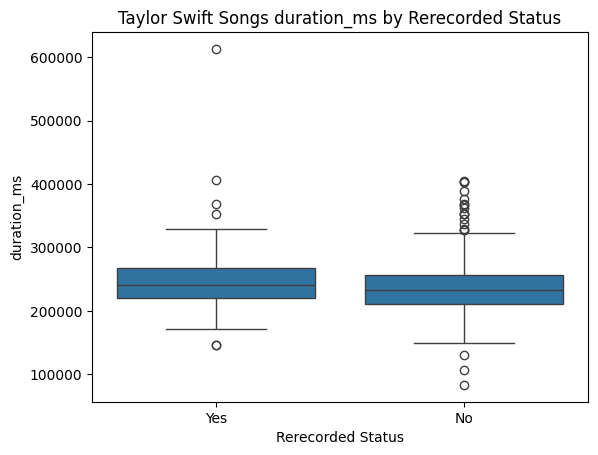

In [60]:
# Create box plots to compare the distributions
for i, col in enumerate(['popularity', 'danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']):
    plt.figure(i)
    sns.boxplot(x='rerecorded', y=col, data=ts)
    plt.title(f'Taylor Swift Songs {col} by Rerecorded Status')
    plt.xlabel('Rerecorded Status')
    plt.ylabel(col)

In [87]:
#ANOVA

for col in ['popularity', 'danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']: #github copilot assisted with the for loop
    model = ols(f'{col} ~ C(rerecorded)', data=ts).fit()
    col = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA Table for {col}:")
    print(anova_table)


ANOVA Table for                       sum_sq     df          F        PR(>F)
C(rerecorded)   21909.234188    1.0  113.88619  3.300855e-24
Residual       101575.754491  528.0        NaN           NaN:
                           sum_sq     df          F    PR(>F)
C(popularity_label)  2.352113e+10    1.0  11.272826  0.000843
Residual             1.101690e+12  528.0        NaN       NaN

ANOVA Table for                  sum_sq     df         F    PR(>F)
C(rerecorded)  0.000246    1.0  0.019167  0.889943
Residual       6.769058  528.0       NaN       NaN:
                           sum_sq     df          F    PR(>F)
C(popularity_label)  2.352113e+10    1.0  11.272826  0.000843
Residual             1.101690e+12  528.0        NaN       NaN

ANOVA Table for                   sum_sq     df          F    PR(>F)
C(rerecorded)   0.634841    1.0  17.850515  0.000028
Residual       18.777949  528.0        NaN       NaN:
                           sum_sq     df          F    PR(>F)
C(popularity_labe

In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [65]:
#Tukey's HSD
for col in ['popularity', 'energy', 'acousticness', 'duration_ms']:
    res = pairwise_tukeyhsd(ts[col], ts['rerecorded'])
    print(f"Comparison of {col} by Rerecorded Status")
    print(res)
    print(" ")

Comparison of popularity by Rerecorded Status
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    No    Yes  15.3178   0.0 12.4981 18.1376   True
---------------------------------------------------
 
Comparison of energy by Rerecorded Status
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.0825   0.0 0.0441 0.1208   True
-------------------------------------------------
 
Comparison of acousticness by Rerecorded Status
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
    No    Yes  -0.2048   0.0 -0.269 -0.1406   True
--------------------------------------------------
 
Comparison of duration_ms by Rerecorded Status
   Multiple Comparison of Means - Tukey HSD

BONUS, worth up to 2 points: How would you determine whether [Taylor Swift has had an effect on the popularity of football](https://duckduckgo.com/?q=taylor+swift+football&atb=v314-1&ia=web)?  What data would you need?  What analysis would you perform?  What would you expect the results to be?

To determine Taylor Swift's impact on football popularity, I would first collect data on football viewership and look at things like when Taylor Swift started dating Travis Kelce and the viewership trends before and after. I would likely use the general viewership data to perform a regression discontinuity analysis, looking to see if there is any trends before and after this most recent season. 

zsh:1: /Users/shirleyaraizasantaella/Documents/UMich/Grad School Year 2/Semester_2/SI_618_DataManipulationAndAnalysis/SI_618_WN_24_Files/.venv/bin/jupyter: bad interpreter: /Users/shirleyaraizasantaella/Downloads/SI_618_WN_24_Files/.venv/bin/python: no such file or directory


### Submit your completed assignment in both IPYNB and HTML formats.